In [19]:
DATA="data-ntp-1-1"
OUTFILESUFFIX="intraffic"

# ii=118

import pandas as pd
import os
import  multiprocessing as mp

# alldf=[]
# for i in range(ii):
#     df = pd.read_csv(DATA+"/"+str(i)+".csv",dtype=str);
#     alldf.append(df)
# df = pd.concat(alldf,axis=0,ignore_index=True)

# df = df[df['src_port']=="123"]

# import pyasn
# import re
# DEFAULT_ASNDB='../sfp-eval/ipasn.20190116.1600.dat'
# asndb = pyasn.pyasn(DEFAULT_ASNDB)
# # src_asn = asndb.lookup(columns[1])[0]

# stat={}
# for i,dd in df.iterrows():
    
#     if not re.match("^(?:[0-9]{1,3}\.){3}[0-9]{1,3}$", str(dd.dst)):
#         print("not ipv4")
#         print(str(dd.dst))
#         continue
#     #print(dd.dst)
#     asl = asndb.lookup(str(dd.dst))[0]
#     if not asl:
#         # print("not aslookup")
#         continue
#     stat.setdefault(asl,{})
#     server = str(dd.src)
#     stat[asl][server] = stat[asl].get(server,0)+int(dd.iplen)


def filter(df):
    return df[df['src_port']=="123"]


def worker(f, ii):
    df = pd.read_csv(f,dtype=str);
    df = filter(df)
    import pyasn
    import re
    DEFAULT_ASNDB='../data/ipasn.20190116.1600.dat'
    asndb = pyasn.pyasn(DEFAULT_ASNDB)
    # src_asn = asndb.lookup(columns[1])[0]
    stat={}
    for i,dd in df.iterrows():
        if not re.match("^(?:[0-9]{1,3}\.){3}[0-9]{1,3}$", str(dd.dst)):
            print("not ipv4")
            print(str(dd.dst))
            continue
        #print(dd.dst)
        asl = asndb.lookup(str(dd.dst))[0]
        if not asl:
            # print("not aslookup")
            continue
        stat.setdefault(asl,{})
        server = str(dd.src)
        stat[asl][server] = stat[asl].get(server,0)+int(dd.iplen)
    return stat
    
p = mp.Pool(processes=32)

ii=0
results_list = []
for root, dirs, files in os.walk(DATA+"/"):
    print(root)
    print(dirs)
    print(files)
    for f in files:
        if f[-4:]==".csv":
            result = p.apply_async(worker,(root+f,ii))
            results_list.append(result)
            ii+=1

p.close()
p.join()
stat = {}
for result in results_list:
    part = result.get()
    for k,v in part.items():
        stat.setdefault(k,{})
        for ip,vol in v.items():
            stat[k][ip] = stat[k].get(ip,0)+vol


data-ntp-1-1/
[]
['52.csv', '68.csv', '104.csv', '5.csv', '80.csv', '86.csv', '85.csv', '47.csv', '117.csv', '66.csv', '93.csv', '58.csv', '83.csv', '124.csv', '55.csv', '23.csv', '57.csv', '39.csv', '63.csv', '31.csv', '38.csv', '3.csv', '30.csv', '1.csv', '102.csv', '2.csv', '9.csv', '101.csv', '82.csv', '69.csv', '70.csv', '103.csv', '8.csv', '24.csv', '71.csv', '78.csv', '29.csv', '100.csv', '0.csv', '17.csv', '110.csv', '13.csv', '114.csv', '51.csv', '75.csv', '18.csv', '79.csv', '34.csv', '90.csv', '59.csv', '122.csv', '81.csv', '74.csv', '40.csv', '7.csv', '65.csv', '109.csv', '92.csv', '49.csv', '67.csv', '76.csv', '84.csv', '56.csv', '111.csv', '21.csv', '119.csv', '19.csv', '97.csv', '6.csv', '32.csv', '12.csv', '10.csv', '35.csv', '88.csv', '42.csv', '28.csv', '54.csv', '62.csv', '36.csv', '46.csv', '99.csv', '126.csv', '91.csv', '77.csv', '27.csv', '22.csv', '106.csv', '94.csv', '15.csv', '16.csv', '43.csv', '108.csv', '33.csv', '105.csv', '53.csv', '125.csv', '64.csv', '89

nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
not ipv4
not ipv4
nan
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
not ipv4
nan
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4
not ipv4
nan
nan
not ipv4
not ipv4
nan
nan
not ipv4
nan
not ipv4
nan
not ipv4
nan
not ipv4
not ipv4
nan
nan
not ipv4

In [20]:
import json
with open('result/ntpstat-%s-%s.json'%(DATA,OUTFILESUFFIX),'w') as f:
    json.dump(stat, f)

In [21]:
with open('../data/stubs.txt') as f:
    t =str(f.read())
    stubs = t.split()

stat2 = {k:v for k,v in stat.items() if str(k) in stubs}
t=[(k,sum(v.values())) for k,v in stat2.items()]
t.sort(key=lambda x:x[1],reverse=True)
total = t[0:50]
stat2 = [(i[0],stat2[i[0]]) for i in t[0:50]]

[14618, 27293, 16509, 38956, 33070, 15169, 46800, 19623, 6075, 36351, 70, 19137, 2013, 53434, 14061, 10264, 3428, 8122, 30633, 13986, 40676, 62468, 42175, 29802, 12258, 16983, 54825, 714, 32823, 21899, 16625, 6167, 793, 14314, 20940, 7203, 55101, 31815, 55990, 4694, 26662, 55933, 22552, 55899, 34931, 60190, 40204, 55127, 38293, 12824]


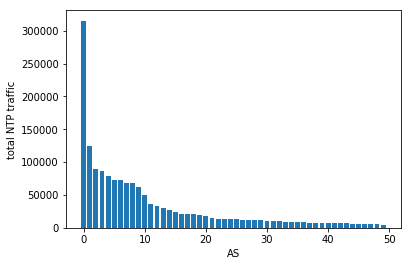

In [22]:
from matplotlib import pyplot as plt

def plot1(total):
    xlabel = []
    y=[]
    for k,v in total:
        xlabel.append(k)
        y.append(v)
    print(xlabel)
    x=list(range(len(total)))
    plt.bar(x,y)
    plt.xlabel("AS")
    plt.ylabel("total NTP traffic")
    plt.savefig("result/totalNTPtraffic-%s-%s.png"%(DATA,OUTFILESUFFIX),dpi=600,bbox_inches='tight')
plot1(total)

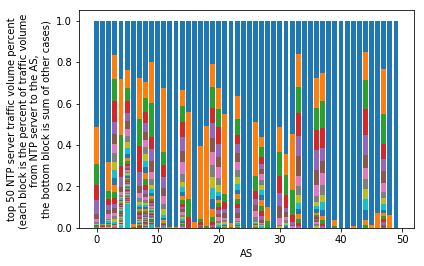

In [23]:

def plot2(stat2):
    xlabel=[]
    y=[]
    for k,v in stat2:
        xlabel.append(str(k))
        yy=list(v.values())
        y.append(yy)

    ml = max(len(yi) for yi in y)

    for yi in y:
        if len(yi)<ml:
            yi.extend([0 for _ in range(ml-len(yi))])
        yi.sort(reverse = True)

    x=list(range(len(xlabel)))

    ry=[]
    for yy in y:
        ry.append(list(sum(yy[i:])/float(sum(yy)) for i in range(50)))


    for i in range(min(ml,50)):
        py = [ry[ii][i] for ii in x]
        plt.bar(x, py)
    # plt.show()
    plt.xlabel('AS')
    plt.ylabel('top 50 NTP server traffic volume percent\n(each block is the percent of traffic volume \nfrom NTP server to the AS, \nthe bottom block is sum of other cases)')
    plt.savefig("result/ntpresult-%s-%s.png"%(DATA,OUTFILESUFFIX),dpi=600, bbox_inches='tight')
    return xlabel

asnum = plot2(stat2)